<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/shutterstock_213333985.jpeg' width="700">
   
   **Credit:**  [shutterstock](https://www.shutterstock.com/image-photo/school-books-on-desk-education-concept-213333985)


In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings


# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")
sns.set(style='ticks')

# Modeling
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 

In [2]:
# load file
language = pd.read_csv('data/df_language_with_dummies')
language.head().T

,0,1,2,3,4
School Name,21st Century Learning Institute,A. E. Arnold Elementary,A. G. Cook Elementary,A. G. Currie Middle,A. J. Dorsa Elementary
School Code,129882,6027767,6028211,6085377,6046114
Zip Code,92223,90630,92844,92780,95122
County Name,Riverside,Orange,Orange,Orange,Santa Clara
County Code,33.0,30.0,30.0,30.0,43.0
Latitude,33.962281,33.8249,33.7777,33.7431,37.369388
Longitude,-116.984589,-118.0457,-117.953,-117.8249,-121.83356
Median Household Income,64738.0,84051.0,48345.0,64089.0,57470.0
CAASPP Reported Enrollment,58.0,447.0,192.0,585.0,184.0
CAASPP Reported Enrollment-Dummy,1,1,1,1,1


In [3]:
# copy original df
language_df = language.copy()

In [4]:
# Drop columns not useful in the model
language_df = language_df.drop(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude'], axis=1)

In [5]:
# Overview of the data check all features are numeric
language_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Median Household Income            9646 non-null   float64
 1   CAASPP Reported Enrollment         9646 non-null   float64
 2   CAASPP Reported Enrollment-Dummy   9646 non-null   int64  
 3   Enrollment K-12                    9646 non-null   float64
 4   Enrollment K-12-Dummy              9646 non-null   int64  
 5   Total Revenue per Pupil            9646 non-null   float64
 6   Total Expenditures per Pupil       9646 non-null   float64
 7   Free Meal Count K-12               9646 non-null   float64
 8   Current Expense Per ADA            9646 non-null   float64
 9   Male                               9646 non-null   float64
 10  Male-Dummy                         9646 non-null   int64  
 11  Female                             9646 non-null   float

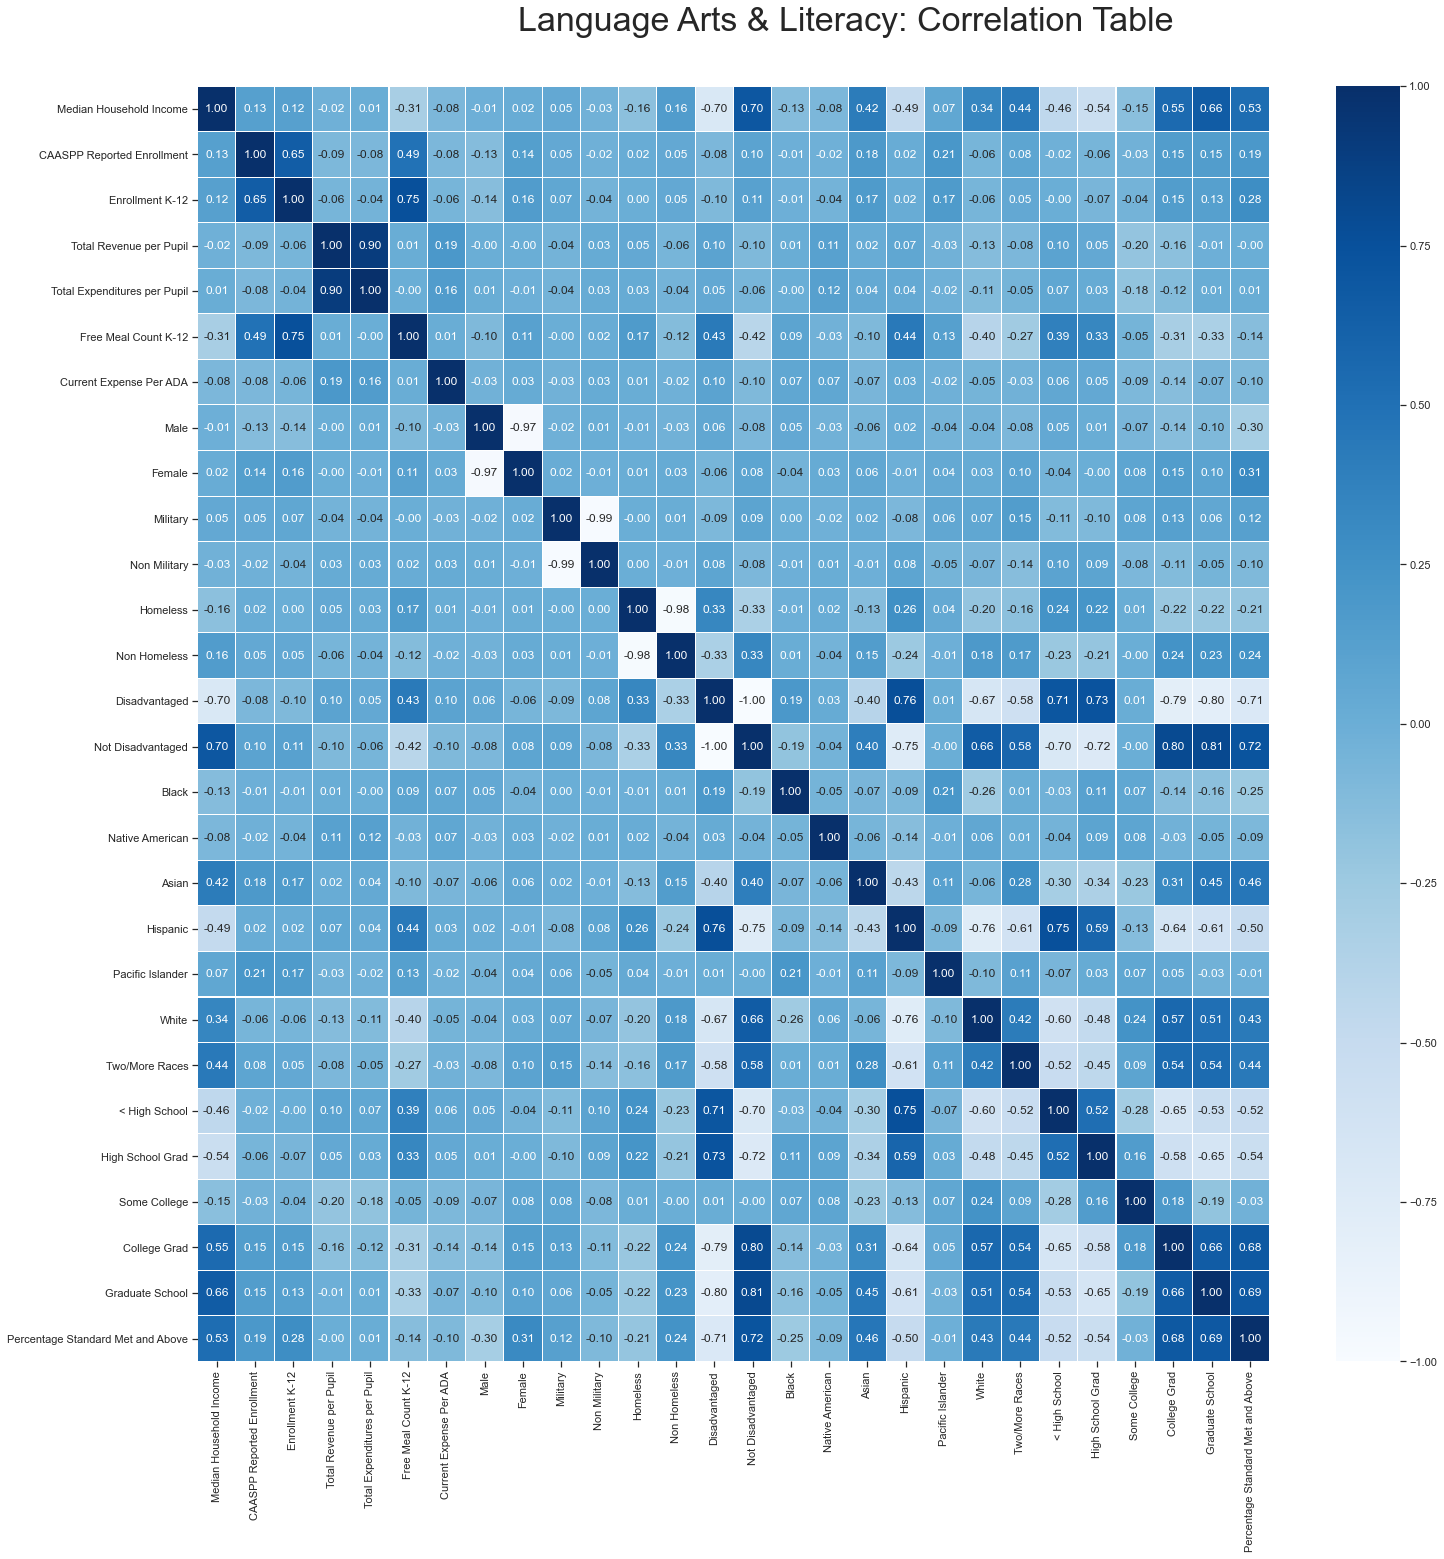

In [6]:
table = language_df[['Median Household Income', 'CAASPP Reported Enrollment','Enrollment K-12',
       'Total Revenue per Pupil','Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Current Expense Per ADA', 'Male', 'Female','Military', 'Non Military','Homeless','Non Homeless',
       'Disadvantaged','Not Disadvantaged', 'Black','Native American','Asian','Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad', 'Some College','College Grad',
       'Graduate School','Percentage Standard Met and Above']]

# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, cmap="Blues", ax=ax, fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

In [7]:
# Dimensions of the dataset 
language_df.shape

(9646, 50)

Text(0, 0.5, '% Pass')

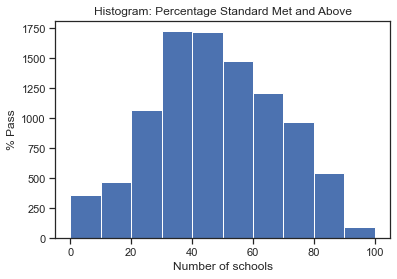

In [8]:
# distrubution of the dependent var
plt.hist(language_df['Percentage Standard Met and Above'])

plt.title("Histogram: Percentage Standard Met and Above")
plt.xlabel("Number of schools")
plt.ylabel("% Pass")

# MODELING

#### Train/Test Split

In [9]:
# dependent variable
y = language_df['Percentage Standard Met and Above']

# Include all columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

In [10]:
# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [11]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7234, 49) y_train:  (7234,) X_test : (2412, 49) y_test:  (2412,)


## Multiple regression
1. sklearn

In [12]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [13]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [14]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train))

0.7205538514436916


In [15]:
# Access model performance r^2 - train, test
median_r2 = r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)
median_r2

(0.7205538514436916, 0.7146494433367998)

Text(0, 0.5, 'Predicted values')

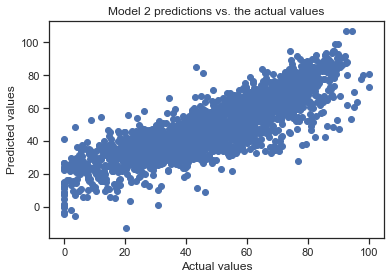

In [16]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_te_pred)

# Label 
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Ordinary Least Square Method (OLS)
2. Statsmodel

#### Train/Test Split

In [17]:
# Create test and train datasets
# Include all columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)
y = language_df['Percentage Standard Met and Above']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [18]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7234, 49) y_train:  (7234,) X_test : (2412, 49) y_test:  (2412,)


In [19]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel2 = sm.OLS(y_train, X_train)
# Fit the model
rModel2_results = rModel2.fit()

In [20]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.721
Model:                                           OLS   Adj. R-squared:                  0.719
Method:                                Least Squares   F-statistic:                     395.1
Date:                               Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                                       21:04:02   Log-Likelihood:                -27502.
No. Observations:                               7234   AIC:                         5.510e+04
Df Residuals:                                   7186   BIC:                         5.543e+04
Df Model:                                         47                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Median Household Income          -2.016e-05    7.9e-06     -2.550      0.011   -3.56e-05   -4.66e-06
CAASPP Reported Enrollment          -0.0051      0.001     -7.110      0.000      -0.007      -0.004
CAASPP Reported Enrollment-Dummy   -60.3037     16.201     -3.722      0.000     -92.063     -28.544
Enrollment K-12                      0.0047      0.001      7.881      0.000       0.004       0.006
Enrollment K-12-Dummy               13.2168      1.795      7.363      0.000       9.698      16.735
Total Revenue per Pupil              0.0006   8.83e-05      7.095      0.000       0.000       0.001
Total Expenditures per Pupil        -0.0002   8.28e-05     -1.971      0.049      -0.000   -8.94e-07
Free Meal Count K-12                 0.0027      0.001      2.369      0.018       0.000       0.005
Current Expense Per ADA          -4.772e-05   3.07e-05     -1.556      0.120      -0.000    1.24e-05
Male                                -0.2690      0.132     -2.045      0.041      -0.527      -0.011
Male-Dummy                          24.5830      4.010      6.130      0.000      16.722      32.445
Female                               0.2392      0.133      1.802      0.072      -0.021       0.499
Female-Dummy                        -2.9176      2.646     -1.102      0.270      -8.105       2.270
Military                             0.6336      0.300      2.109      0.035       0.045       1.223
Military-Dummy                       0.8921      0.523      1.707      0.088      -0.132       1.916
Non Military                         0.5501      0.300      1.835      0.067      -0.038       1.138
Non Military-Dummy                 -60.3037     16.201     -3.722      0.000     -92.063     -28.544
Homeless                             0.6488      0.119      5.432      0.000       0.415       0.883
Homeless-Dummy                      -1.0279      0.373     -2.754      0.006      -1.759      -0.296
Non Homeless                         0.6877      0.118      5.817      0.000       0.456       0.919
Non Homeless-Dummy                 -27.1743      6.107     -4.450      0.000     -39.145     -15.204
Disadvantaged                        0.0727      0.090      0.804      0.422      -0.105       0.250
Disadvantaged-Dummy                 -2.3862      1.854     -1.287      0.198      -6.020       1.248
Not Disadvantaged                    0.2897      0.091      3.201      0.001       0.112       0.467
Not Disadvantaged-Dummy             -2.5699      1.090     -2.358      0.018      -4.706      -0.433
Black                               -0.0351      0.031     -1.121      0.262      -0.096  

In [21]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)


Text(0, 0.5, 'Predicted values')

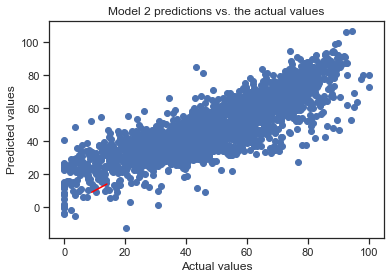

In [22]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(9,15)],[x for x in range(9,15)], color='red')

# Label 
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

## Model Performance
- MAE
- MSE
- R_squared

In [23]:
# Define a function to check the RMSE
# def rmse(predictions, targets):
#     return np.sqrt(((predictions - targets) ** 2).mean())

In [24]:
median_mae = mean_absolute_error(y_test, y_pred)
median_mae

8.507461195812601

In [25]:
# MSE - train, test
median_mse = mean_squared_error(y_test, y_pred)
median_mse

126.24844007906644

In [26]:
median_r2 = r2_score(y_test, y_pred)
median_r2


0.7149667683705045

## Cross Validation
- Performance Evaluation

Cross validation is a technique for assessing how the statistical analysis generalises to an independent data set.It is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. Using cross-validation, there are high chances that we can detect over-fitting with ease

## Confusion Matrix
- Access model performance